# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. The dataset is given as .npz file, and will contain data in  numpy array. 

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. You are allowed to use the numpy library to calculate eigen values. All other functions for reconstruction, clustering, etc., should be written from scratch.

12. Change the name of the file with your roll no.



In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 5: Life in Lower Dimensions

You are provided with a dataset of 1797 images - each image is 8x8 pixels and provided as a feature vector of length 64. You will try your hands at transforming this dataset to a lower-dimensional space using PCA, and perform K-means clustering the images in this reduced space.
 




In [2]:
# Cell type : CodeWrite
# write the function for PCA and K-means clustering here. 
def comp_eig(X): 
  X_bar = np.mean(X,axis=0)[None,:]
  S = np.dot(X.T-X_bar.T , X-X_bar)/len(X)
  return np.linalg.eig(S)

def red_dim(U,M,X,D):
  X_bar = np.mean(X,axis=0)
  N=len(X)
  Z = np.zeros((N,M)) 
  b = np.zeros(D)
  for n in range(N):
    for i in range(M):
        Z[n,i]= np.dot(X[n],U[:,i])
  
  for i in range(M,D):
    b[i] = np.dot(X_bar,U[:,i])
  
  return (Z,b)

def get_xtilda(U,Z,b,N,M,D):
  X_tilde = np.zeros(X.shape)
  for n in range(N):
    for i in range(M):
        X_tilde[n,:] += Z[n,i]*U[:,i].T
        
    for i in range(M,D):
        X_tilde[n,:] += b[i]*U[:,i].T
  return X_tilde

def k_means(X,K):
  D =X.shape[1]
  Z=X.copy()
  means = Z[:K,:]
  means.reshape(K,D)
  clusters = np.zeros((1,N))
  distances = np.zeros((K,N))
  diff = -1
  dis2 = 0
  dis1 = 0
  while(diff !=0):
    dis2=0
    for i in range(K):
      Z = X.copy()
      mean = means[i,:]
      mean.resize(1,D)
      for j in range(N):
        Z[j,:] = (Z[j,:] - mean)**2
      sum = Z.sum(axis = 1)
      sum.resize(1,N)
      distances[i,:]=sum.copy()
    assign = np.argmin(distances,axis=0)
    clusters = assign.copy()
    means.fill(0)
    nums = np.zeros((1,K))
    Z = X.copy()
    for i in range(N):
      means[assign[i],:]+=Z[i,:]
      nums[0,assign[i]]+=1
      dis2+=distances[assign[i],i]
    for i in range(K):
      if nums[0,i] > 0 :
        means[i,:]/=nums[0,i]
    diff = dis1 - dis2
    dis1 = dis2
  return (clusters , dis1)


def avg_silhouette(Z4,clu,K):
  clu = clu.copy()
  Z = Z4.copy()
  min = np.inf
  s=0
  N=len(Z4)
  for i in range(N):
    sum = np.zeros((1,K))
    nums = np.zeros((1,K)) 
    for j in range(N):
      sum[0,clu[j]]+=np.linalg.norm(Z[j,:]-Z[i,:])
      nums[0,clu[j]]+=1
    avg = sum/nums
    a = avg[0,clu[i]]
    avg[0,clu[i]]=np.inf
    b = avg[0,np.argmin(avg)]
    s+=(b-a)/max(b,a)
  return s/N
    

**Cell type : TextRead**

# Problem 5

#### 5a) Run PCA algorithm on the given data-set. Plot the cumulative percentage variance explained by the principal components. Report the number of principal components that contribute to 90% of the variance in the dataset.




number of principal components that contribute to 90% of the variance in the dataset  21


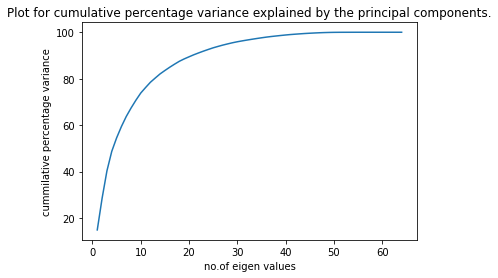

In [6]:
# Cell type : CodeWrite
# write the code for loading the data, running the PCA algorithm, and plotting. 
# (Use the functions written previously.)
Data = np.load("Data.npz")
X = Data["arr_0"]
eigenvals,eigenvecs = comp_eig(X)
sum = np.sum(eigenvals)
cummsum = np.cumsum(eigenvals)
cumpercent = (cummsum/sum)*100
plt.title("Plot for cumulative percentage variance explained by the principal components.")
plt.xlabel("no.of eigen values")
plt.ylabel("cummilative percentage variance")
plt.plot(np.arange(1,65),cumpercent)
i=0
for y in cumpercent:
  i = i+1
  if y > 90:
    print("number of principal components that contribute to 90% of the variance in the dataset"+" ",i)
    break

####5b)  Perform reconstruction of data using the dimensionality-reduced data considering the number of dimensions [2,4,8,16]. Report the Mean Square Error (MSE) between the original data and reconstructed data, and interpret the optimal dimensions $\hat{d}$ based on the MSE values.



In [7]:
# Cell type : CodeWrite
# Write the code for data reconstruction, run the algorithm for dimensions.
U = np.array(eigenvecs)
N = len(X)
Z1,b1 = red_dim(U,2,X,64)
Z2,b2 = red_dim(U,4,X,64)
Z3,b3 = red_dim(U,8,X,64)
Z4,b4 = red_dim(U,16,X,64)
Z5,b5 = red_dim(U,64,X,64)

X1_tilde = get_xtilda(U,Z1,b1,N,2,64)
X2_tilde = get_xtilda(U,Z2,b2,N,4,64)
X3_tilde = get_xtilda(U,Z3,b3,N,8,64)
X4_tilde = get_xtilda(U,Z4,b4,N,16,64)
X5_tilde = get_xtilda(U,Z5,b5,N,64,64)

avg_sqd_distance1 = np.sum((X-X1_tilde)**2)/len(X)
print("MSE for D=2")
print("Literally calculating ",avg_sqd_distance1)
print("using eigen values",np.sum(eigenvals[2:64]))
avg_sqd_distance2 = np.sum((X-X2_tilde)**2)/len(X)
print("MSE for D=4")
print("Literally calculating ",avg_sqd_distance2)
print("using eigen values",np.sum(eigenvals[4:64]))
avg_sqd_distance3 = np.sum((X-X3_tilde)**2)/len(X)
print("MSE for D=8")
print("Literally calculating ",avg_sqd_distance3)
print("using eigen values",np.sum(eigenvals[8:64]))
avg_sqd_distance4 = np.sum((X-X4_tilde)**2)/len(X)
print("MSE for D=16")
print("Literally calculating ",avg_sqd_distance4)
print("using eigen values",np.sum(eigenvals[16:64]))

MSE for D=2
Literally calculating  858.9447808487328
using eigen values 858.9447808487348
MSE for D=4
Literally calculating  616.1911300562695
using eigen values 616.1911300562708
MSE for D=8
Literally calculating  391.79473611497656
using eigen values 391.794736114977
MSE for D=16
Literally calculating  180.93970325737862
using eigen values 180.93970325737868


####5c) Apply K-means clustering on the reduced dataset from last subpart (b) (i.e., the $R^{64}$ to $R^\hat{d}$ reduced dataset; pick the initial k points as cluster centers during initialization). Report the optimal choice of K you have made from the set [1...15]. Which method did you choose to find the optimum number of clusters? And explain briefy why you chose that method. Also, show the 2D scatter plot (consider only the first two dimensions of optimal $\hat{d}$) of the datapoints based on the cluster predicted by K-means (use different color for each cluster).


m =  10 seems to give optimal clustering using silhouette average method


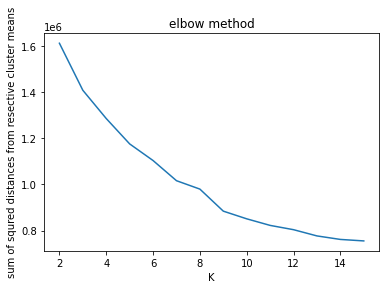

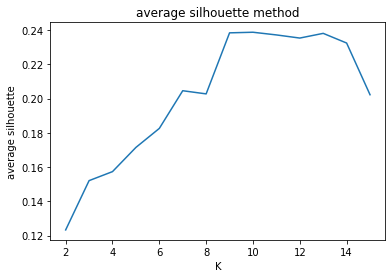

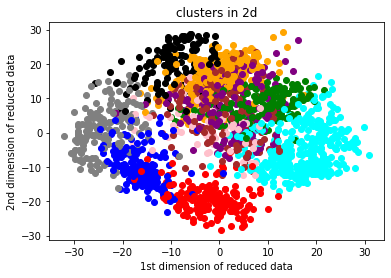

In [9]:
# Cell type : CodeWrite
# Write the code for dimensionality reduction, run k-means algorithm on the reduced data-set and do plotting.
x=[]
y=[]
for i in range(2,16):
  clu,obj_fun = (k_means(Z4,i))
  x.append(obj_fun)
  y.append(avg_silhouette(Z4,clu,i))

plot1 = plt.figure(1)
plt.title("elbow method")
plt.xlabel("K")
plt.ylabel("sum of squred distances from resective cluster means")
plt.plot(range(2,16),x)
plot2 = plt.figure(2)
plt.title("average silhouette method")
plt.xlabel("K")
plt.ylabel("average silhouette")
plt.plot(range(2,16),y)
opt_clu = np.argmax(y)+2
print("m = ",opt_clu,"seems to give optimal clustering using silhouette average method")
clu,obj_fun = k_means(Z4,opt_clu)
col =["red","black","pink","green","gray","cyan","blue","orange","purple","brown"]
plot2 = plt.figure(3)
plt.title("clusters in 2d")
plt.xlabel("1st dimension of reduced data")
plt.ylabel("2nd dimension of reduced data")
for i in range(N):
  plt.scatter(Z4[i,0],Z4[i,1],c=col[clu[i]])
plt.show()
# for i in range(N):
#     plt.scatter(Z4[i,1], Z4[i,0],c='blue')

####5d) In the next TextWrite cell, Summarise and explain your observations from the above experiments. Is the PCA+K-means clustering consistent with how your brain would cluster the images?



**Cell type : TextWrite**

Report your observations, MSE values and the method used to choose the optimal number of clusters.

number of principal components that contribute to 90% of the variance in the dataset  21

MSE for D=2

Literally calculating  858.9447808487328

using eigen values 858.9447808487348


MSE for D=4

Literally calculating  616.1911300562695

using eigen values 616.1911300562708

MSE for D=8

Literally calculating  391.79473611497656

using eigen values 391.794736114977

MSE for D=16

Literally calculating  180.93970325737862

using eigen values 180.93970325737868

used silhouette average method for finding optimal number of clusters

**observations**


have obsorved with the increse in dimenctions in PCA we were able minimise the error


	looked into some of elements in same clusters when number clusers are chosen to be 4 felt like different types of images are grouped into one

	similarly looked into some clusters with K >10 felt like some clusters are almost same

	and felt that when K>=7 and K<=10 clusters are formed well
